### Bagging ### 

## O que é o Bagging? 



Imagine que você precisa tomar uma decisão importante, como escolher um carro. Em vez de decidir sozinho, você pergunta a opinião de 10 amigos. No entanto, você não dá a todos os amigos exatamente a mesma lista de informações. Para cada amigo, você cria uma lista de prós e contras, selecionando aleatoriamente da sua lista principal de informações, às vezes repetindo um ponto importante (por exemplo, "segurança" pode aparecer duas vezes na lista de um amigo).



Passo a Passo para o Bagging
Aqui está o processo do algoritmo Bagging de forma estruturada:

Definição do Número de Estimadores (n_estimators):

Primeiro, escolha quantos modelos base (por exemplo, Árvores de Decisão) você quer treinar. Vamos chamar esse número de B. Um valor comum pode ser entre 10 e 500.

Bootstrap (Criação das Amostras):

A partir do seu conjunto de dados de treino original com N exemplos, crie B novas amostras de dados.

Cada uma dessas B amostras é criada selecionando N exemplos do conjunto de dados original com reposição.

Isso significa que cada nova amostra terá o mesmo tamanho da original, mas com uma composição diferente: algumas observações originais podem aparecer múltiplas vezes, e outras podem não aparecer (essas são chamadas de out-of-bag samples).

Modelagem (Treinamento dos Modelos):

Para cada uma das B amostras criadas no passo anterior, treine um modelo base (geralmente o mesmo tipo de algoritmo para todos, como uma Árvore de Decisão).

Como cada modelo é treinado em um conjunto de dados ligeiramente diferente, cada um aprenderá padrões um pouco distintos, tornando-se "especialista" em diferentes aspectos dos dados. Ao final, você terá B modelos treinados independentemente.

Agregação (Combinação para a Previsão Final):

Para fazer uma previsão para um novo dado, passe esse dado por todos os B modelos que você treinou.

Colete a previsão de cada um dos B modelos.

Combine essas previsões para obter a predição final do ensemble:

Para tarefas de Classificação: A predição final é a classe que recebeu o maior número de "votos" entre os modelos (votação majoritária).

Para tarefas de Regressão: A predição final é a média de todas as previsões numéricas dos modelos.

O resultado é um único modelo (o ensemble Bagging) que é muito mais robusto e menos propenso a overfitting do que qualquer um dos modelos individuais.

In [4]:
# Importando todas as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# --------------------------------------------------------------------
# ETAPA 1: PREPARAÇÃO DOS DADOS
# --------------------------------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
train_df['target'] = y_train
print("--- Dados Prontos ---")

# --------------------------------------------------------------------
# ETAPA 2: TREINAMENTO DOS MODELOS COM VISUALIZAÇÃO DO BOOTSTRAP
# --------------------------------------------------------------------
n_estimators = 10
base_models = []

print(f"\n--- Iniciando o Treinamento e Mostrando o Esquema de Bootstrap ---")
for i in range(n_estimators):
    print(f"\n---> Treinando Modelo {i+1}/{n_estimators}")
    
    # Bootstrap: Criar uma amostra com reposição
    bootstrap_sample = train_df.sample(frac=1, replace=True, random_state=i)
    
    # Mostrando os índices da amostra para provar que são diferentes
    # Note como alguns números se repetem (reposição) e a ordem muda
    print(f"Índices da amostra bootstrap (primeiros 15): {bootstrap_sample.index[:15].values}")

    X_sample = bootstrap_sample.iloc[:, :-1].values
    y_sample = bootstrap_sample.iloc[:, -1].values

    # Modelagem: Treinar um modelo base
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_sample, y_sample)
    base_models.append(model)
    print(f"Modelo {i+1} treinado.")

print("\n--- Treinamento de todos os modelos concluído! ---")


# --------------------------------------------------------------------
# ETAPA 3: MOSTRANDO O ESQUEMA DE VOTAÇÃO (AGREGAÇÃO)
# --------------------------------------------------------------------
print("\n--- Vendo o Esquema de Votação (Agregação) em Ação ---")

# Vamos pegar o PRIMEIRO dado do conjunto de teste para usar como exemplo
sample_to_predict = X_test[0:1] # Pegando a primeira linha
actual_value = y_test[0]

print(f"Amostra de teste a ser prevista: {sample_to_predict[0]}")
print(f"Valor real dessa amostra: Classe {actual_value} ({iris.target_names[actual_value]})")
print("-" * 30)

# Lista para guardar o voto de cada modelo
all_votes = []

# Pedir para cada modelo votar
for i, model in enumerate(base_models):
    prediction = model.predict(sample_to_predict)
    vote = prediction[0]
    all_votes.append(vote)
    print(f"Modelo {i+1} votou na classe: {vote} ({iris.target_names[vote]})")

# Agregação: Contar os votos
final_prediction, _ = mode(all_votes, keepdims=False)

print("-" * 30)
print(f"Todos os votos dos 10 modelos: {all_votes}")
print(f"Resultado da Votação (a classe mais votada): Classe {final_prediction}")
print(f"A predição final do Bagging está CORRETA? -> {final_prediction == actual_value}")

--- Dados Prontos ---

--- Iniciando o Treinamento e Mostrando o Esquema de Bootstrap ---

---> Treinando Modelo 1/10
Índices da amostra bootstrap (primeiros 15): [ 44  47  64  67  67 103   9  83  21  36  87  70  88  88  12]
Modelo 1 treinado.

---> Treinando Modelo 2/10
Índices da amostra bootstrap (primeiros 15): [37 12 72  9 75  5 79 64 16  1 76 71  6 25 50]
Modelo 2 treinado.

---> Treinando Modelo 3/10
Índices da amostra bootstrap (primeiros 15): [ 40  15  72  22  43  82  75 104   7  34  49  95  75  85  47]
Modelo 3 treinado.

---> Treinando Modelo 4/10
Índices da amostra bootstrap (primeiros 15): [24  3 56 72  0 21 19 74 41 10 21 38 96 20 44]
Modelo 4 treinado.

---> Treinando Modelo 5/10
Índices da amostra bootstrap (primeiros 15): [ 46  55  69   1 104  87  72  50   9  58 103  94  55  55  57]
Modelo 5 treinado.

---> Treinando Modelo 6/10
Índices da amostra bootstrap (primeiros 15): [ 99  78  61 102  16  73   8 100 103  62  27  30  80   7  76]
Modelo 6 treinado.

---> Treinando 

--- Dados Prontos ---

--- Modelo Bagging 'Professor' treinado ---
--- Árvore de Decisão 'Aluna' treinada com base no Bagging ---

Acurácia do Bagging 'Professor': 1.0000
Acurácia da Árvore 'Aluna' (baseada no Bagging): 1.0000
Acurácia de uma Árvore Simples (treinada do zero): 1.0000

--- Visualização da Árvore de Decisão 'Aluna' ---


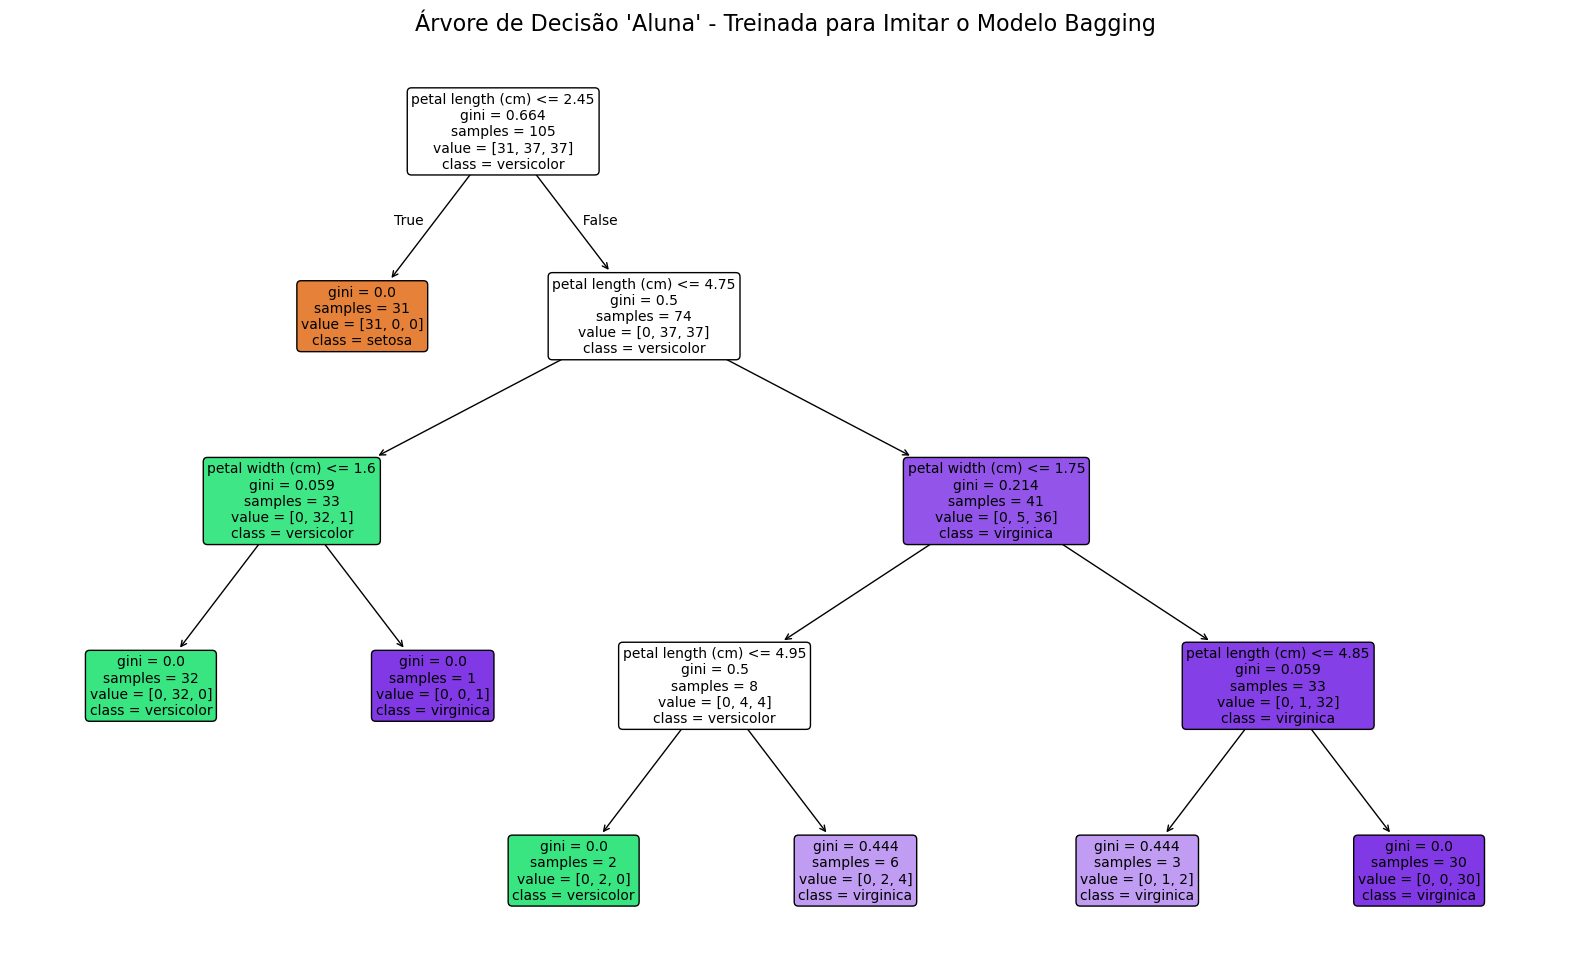

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# --------------------------------------------------------------------
# ETAPA 1: PREPARAÇÃO DOS DADOS (Como antes)
# --------------------------------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("--- Dados Prontos ---")


# --------------------------------------------------------------------
# ETAPA 2: TREINAR O MODELO BAGGING "PROFESSOR"
# --------------------------------------------------------------------
# Usaremos o BaggingClassifier do Scikit-learn para ser o nosso "professor"
bagging_professor = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100, # Usar mais estimadores para um professor mais robusto
    random_state=42
)
bagging_professor.fit(X_train, y_train)
print("\n--- Modelo Bagging 'Professor' treinado ---")

# Obter as previsões do professor para o CONJUNTO DE TREINO
# Estas serão as respostas que a nossa árvore "aluna" tentará aprender
y_train_from_bagging = bagging_professor.predict(X_train)


# --------------------------------------------------------------------
# ETAPA 3: TREINAR A ÁRVORE DE DECISÃO "ALUNA"
# --------------------------------------------------------------------
# Criamos uma nova árvore de decisão, que será a nossa "aluna"
arvore_aluna = DecisionTreeClassifier(random_state=42, max_depth=4) # max_depth para não ficar muito grande

# Treinamos a aluna com os dados de treino (X_train),
# mas ensinando-a a chegar nas respostas do professor (y_train_from_bagging)
arvore_aluna.fit(X_train, y_train_from_bagging)
print("--- Árvore de Decisão 'Aluna' treinada com base no Bagging ---")


# --------------------------------------------------------------------
# ETAPA 4: AVALIAÇÃO E VISUALIZAÇÃO
# --------------------------------------------------------------------
# Avaliar a performance no conjunto de teste para comparar
y_pred_bagging = bagging_professor.predict(X_test)
y_pred_arvore_aluna = arvore_aluna.predict(X_test)

# Para comparação, vamos treinar uma árvore simples original
arvore_simples = DecisionTreeClassifier(random_state=42, max_depth=4).fit(X_train, y_train)
y_pred_arvore_simples = arvore_simples.predict(X_test)

print(f"\nAcurácia do Bagging 'Professor': {accuracy_score(y_test, y_pred_bagging):.4f}")
print(f"Acurácia da Árvore 'Aluna' (baseada no Bagging): {accuracy_score(y_test, y_pred_arvore_aluna):.4f}")
print(f"Acurácia de uma Árvore Simples (treinada do zero): {accuracy_score(y_test, y_pred_arvore_simples):.4f}")


# Visualizar a Árvore "Aluna"
print("\n--- Visualização da Árvore de Decisão 'Aluna' ---")
plt.figure(figsize=(20, 12))
plot_tree(arvore_aluna,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão 'Aluna' - Treinada para Imitar o Modelo Bagging", fontsize=16)
plt.show()